In [1]:
import skimage, PIL, numpy

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Checking the versions

In [2]:
print(skimage.__version__)

0.19.2


In [3]:
print(PIL.__version__)

9.0.1


In [4]:
print(numpy.__version__)

1.26.1


# Installing Pillow

In [5]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


# Reading an Image using pillow

In [6]:
from PIL import Image, ImageFont, ImageDraw
img= Image.open("goat.jpg")

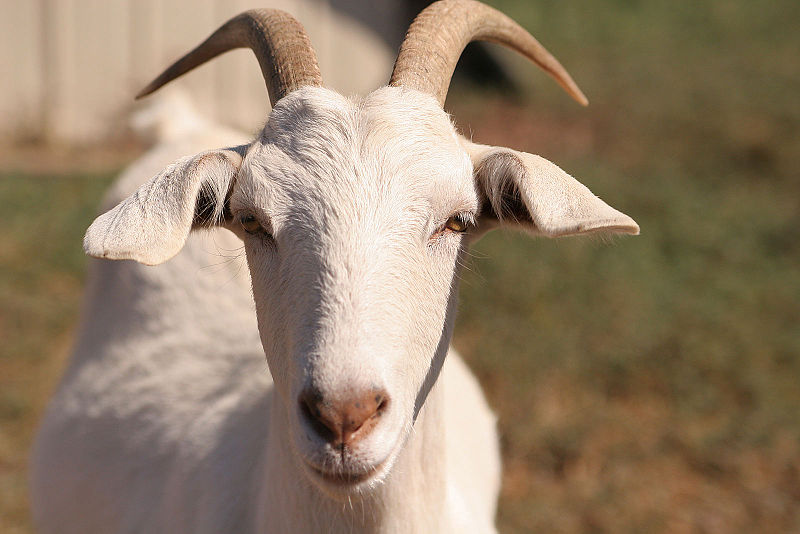

In [7]:
img

In [8]:
img.show() #will show you the image using in paint/software as a seprate file

In [9]:
print(img.width, img.height)

800 534


In [10]:
a= img.width
a

800

In [11]:
b= img.height
b

534

In [12]:
w,h= img.size
w,h

(800, 534)

In [13]:
img.filename

'goat.jpg'

In [14]:
img.format

'JPEG'

# Changing the format of the file/ saving

In [15]:
img.save("goat.png")

# Finding the image layout resolution: Dots per inch

In [16]:
print(img.info['dpi']) #quality of the image of spreading, eg. Zooming an image. Ink spread. Your pixels are not disorted while streching an image

(100, 100)


In [17]:
output_file_path= "C:/Users/Admin/Desktop/Image_Processing_Python/goat1.jpg"

In [18]:
img.save(output_file_path, dpi=(600,600))

(100, 100)


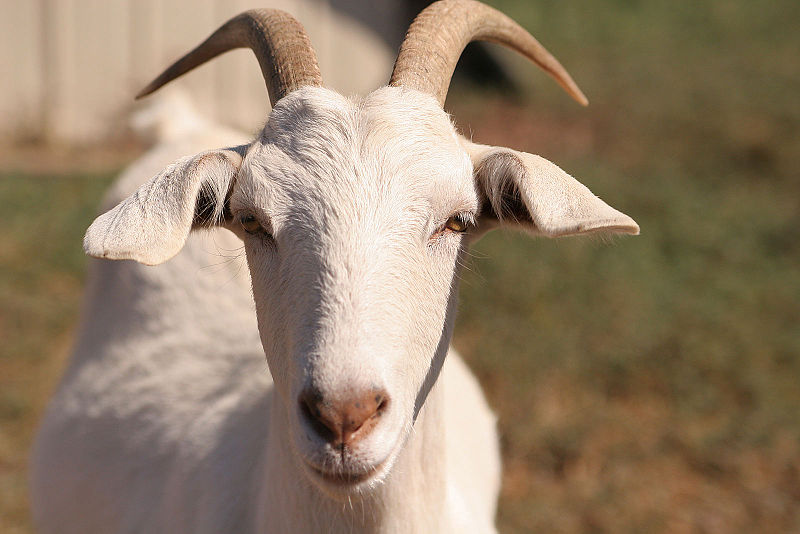

In [19]:
print(img.info['dpi'])
img

# Image Modes

# Converting a Color Image to Gray Scale 

In [20]:
img_gray= img.convert("L")
print(img_gray.mode)

L


# Converting a Gray Image to Binary

L


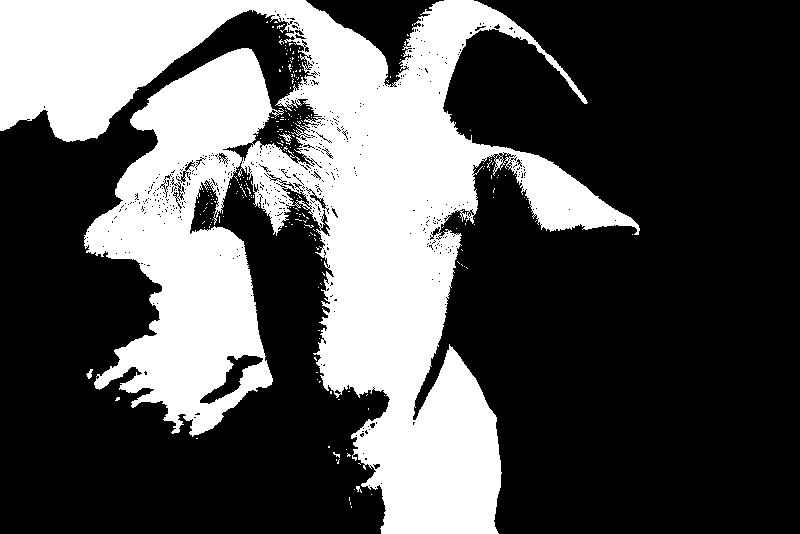

In [21]:
threshold= 150 # below 150 is 0, above 150 is 1. In python we do this on whole image, it can be done using point method. 
img_bin= img_gray.point(lambda x: 255 if x > threshold else 0)
print(img_bin.mode)
img_bin

# Display the Results as in Grid form

The subplot() function takes three arguments that describe the layout of the figure. The layout is organized in rows and columns, which are represented by the first and second argumnet.
plt.subplot(1,2,1): It means the figure has 1 Row, 2 columns, and this plot is the first plot

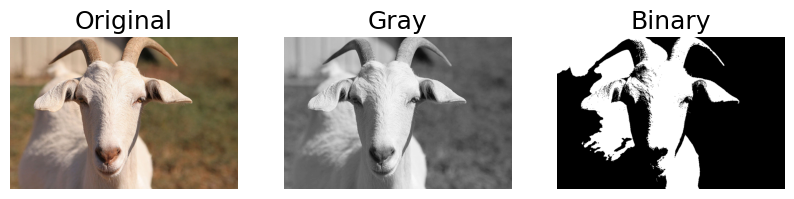

In [22]:
#display results
import matplotlib.pyplot as plt

plt.figure(figsize= (10,8))
plt.subplot(2,3,1)
plt.imshow(img)
plt.axis("off")
plt.title('Original', fontsize=18)

plt.subplot(2,3,2)
plt.imshow(img_gray, cmap= "gray") #color map= cp, and it is not required for rgb images. We use not to beautify it, do on its original gray scale image.
plt.axis("off")
plt.title('Gray', fontsize= 18)

plt.subplot(2,3,3)
plt.imshow(img_bin, cmap= "gray")
plt.axis("off")
plt.title('Binary',fontsize=18)

plt.show()



# What happens if directly convert a Color image to binary?

RGB


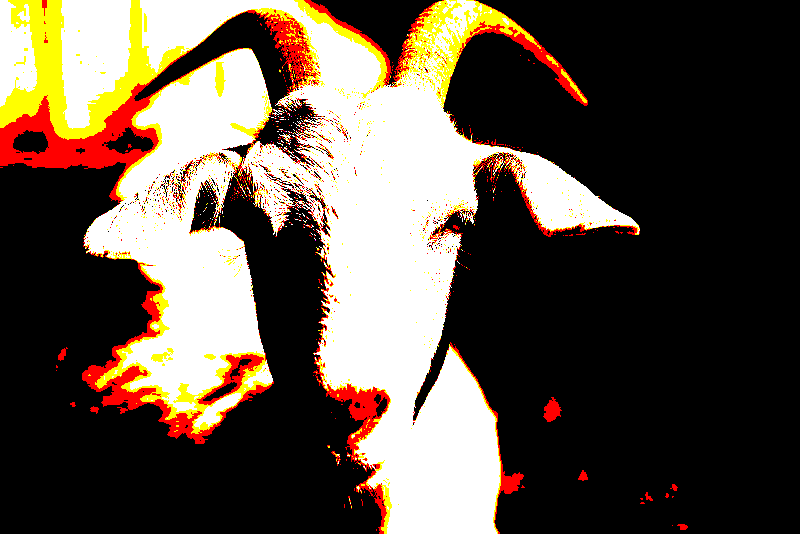

In [23]:
threshold= 150
img_bin1= img.point(lambda x: 255 if x > threshold else 0)
print(img_bin1.mode)
img_bin1

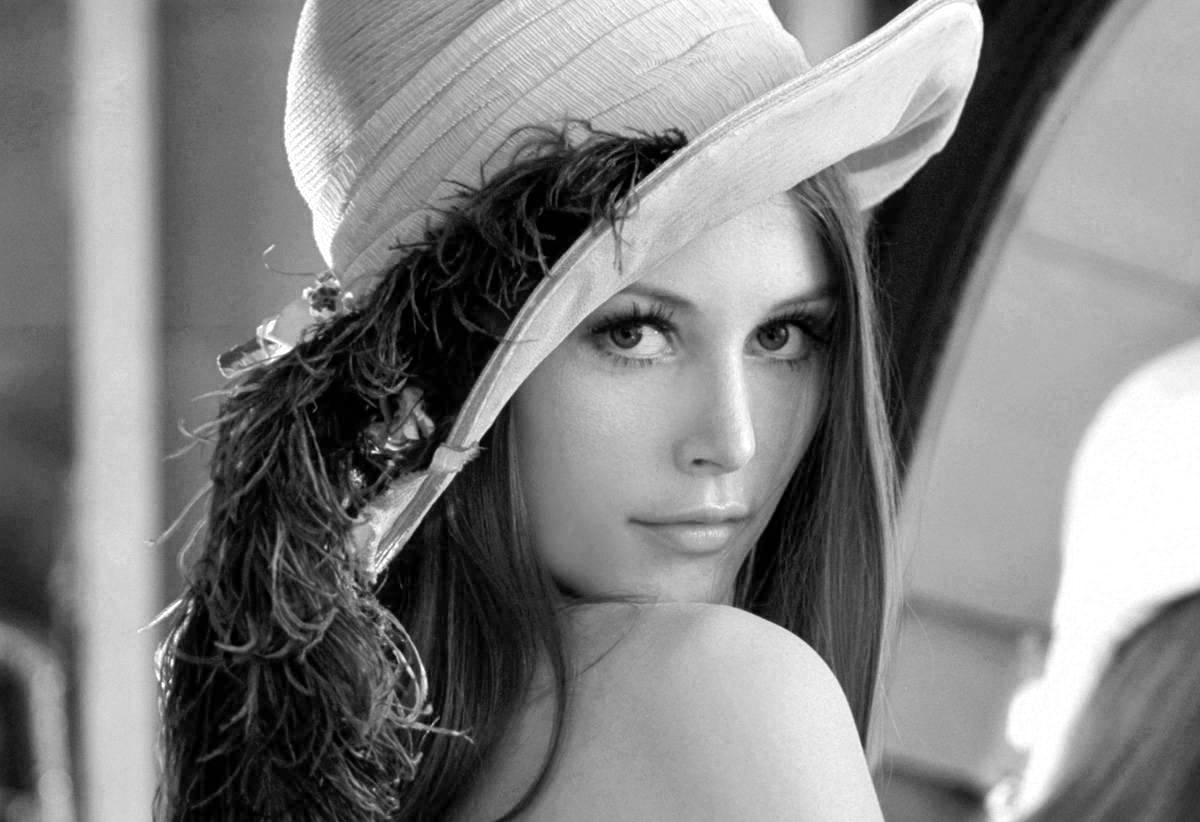

In [24]:
img1= Image.open("lena.jpg")
red_channel, green_channel, blue_channel= img1.split() #break it into 3 different channels
red_channel

# Break a colour image into its corresponding channels

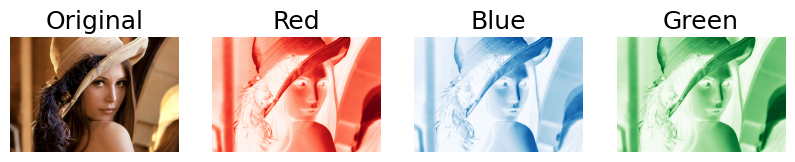

In [25]:
img1= Image.open("lena.jpg")
red_channel, green_channel, blue_channel= img1.split()

plt.figure(figsize= (10,8))
plt.subplot(2,4,1)
plt.imshow(img1)
plt.axis("off")
plt.title('Original', fontsize=18)

plt.subplot(2,4,2)
plt.imshow(green_channel, cmap= "Reds")
plt.axis("off")
plt.title('Red', fontsize= 18)

plt.subplot(2,4,3)
plt.imshow(blue_channel, cmap= "Blues")
plt.axis("off")
plt.title('Blue',fontsize=18)

plt.subplot(2,4,4)
plt.imshow(green_channel, cmap= "Greens")
plt.axis("off")
plt.title('Green',fontsize=18)

plt.show()

In [26]:
print(img1.mode)

RGB


# Converting an Image object to mathematical matrix for further processing 

In [27]:
import numpy as np

In [28]:
img_arr= np.array(img_gray)
print(img_arr)

[[180 180 179 ...  81  80  80]
 [180 180 179 ...  81  80  80]
 [180 180 179 ...  81  80  80]
 ...
 [117 118 118 ...  97  99 100]
 [118 119 119 ... 100 101 102]
 [118 119 119 ... 101 101 102]]


In [29]:
print(img_bin.size, img_arr.shape) #in image width is what column is to matrix and height is to rows

(800, 534) (534, 800)


# Image downsampling and upsampling

In [30]:
img3= Image.open("flowers.png")

img3_gray= img3.convert("L")
print(img3_gray.size)

img4_gray= np.array(img3_gray.resize((1200, 822), Image.BILINEAR))/255 #BILINEAR is the algorithm we use for zooming or shrinking of an image
print(img4_gray.shape)

(2048, 1365)
(822, 1200)


# Merge the channels of an image

In [31]:
channels= (red_channel, green_channel, blue_channel)

rgb_image= Image.merge("RGB", channels)

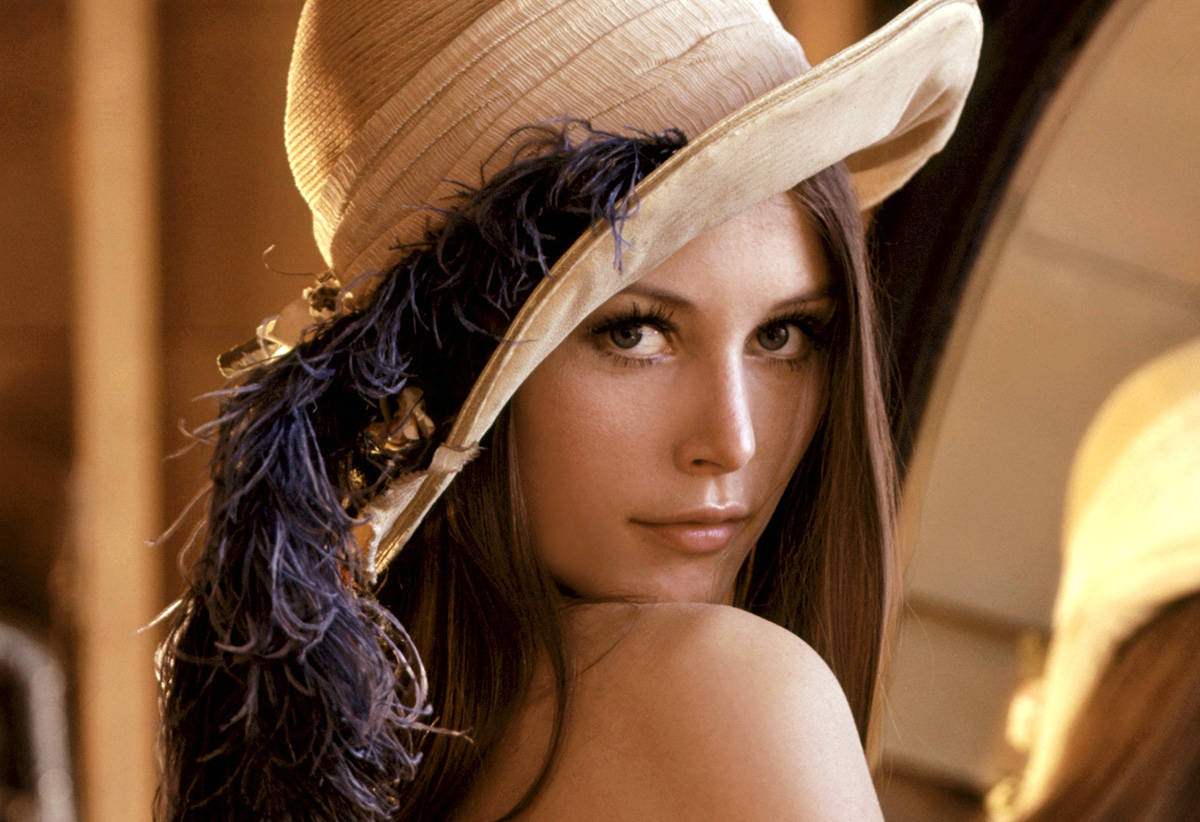

In [32]:
rgb_image

In [33]:
#array to image converter
array= np.zeros([100,200,3], dtype= np.uint8)
array[:,:100]= [255,128,0]
array[:,100:]= [0,0,255]

In [34]:
img= Image.fromarray(array)
img.save('output.png')

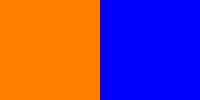

In [35]:
img

In [36]:
img= Image.fromarray(img_arr)
img.save('goat1.png')

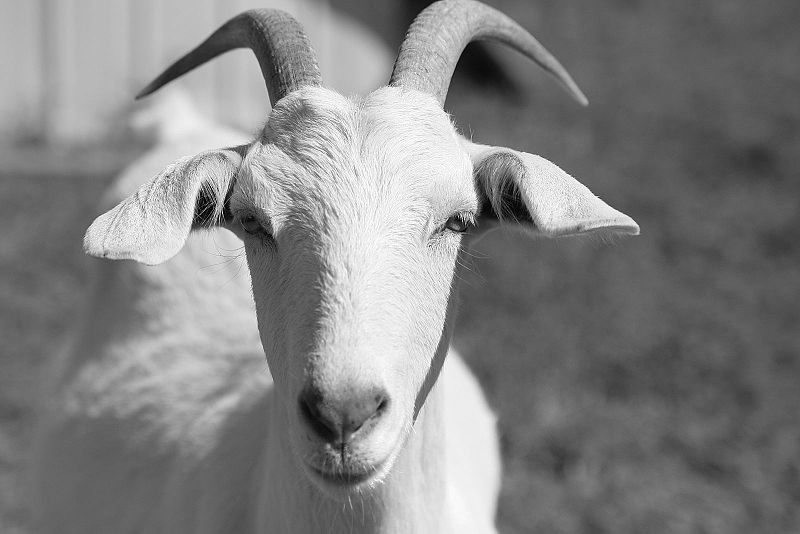

In [37]:
img

TypeError: Cannot interpret '42' as a data type